# Ex 1: Basic concepts on random variables and probability distributions

## Introduction
This notebook includes a series of cells with code (Python) and descriptive text (markdown) and provides a number of exercises. Work through the exercises and add, as appropriate, new cells with your code 
or descriptive text to answer the questions. All required data are provided in your exercise folder.

To submit your work, follow the steps '**Before you submit**' and '**How to submit**' in the *intro2notebook.ipynb* file contained in the *ex0_introduction_to_python.zip*.

Please note, that this is the same for all following exercises.

### Part I: Basic statistics and probability calculation

In [93]:
#First import some of the basic python packages we want to use:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import hypergeom, binom, poisson
import math
%matplotlib inline

#### Question 1

From monthly data (file *P_uppmonth1.dat*): compute for each month (column wise) mean, median, mode, standard deviation, coefficient of variation, minimum and maximum. Plot these values (except the mode) to show the annual variation. Note that coefficient of variation has a different unit than the other statistics, and thus needs to be plotted in a separate figure.

In [2]:
# Basic statistics can be easily calculated by defining DataFrames in pandas (like we did above)

# To add all of the values in a particular column of a DataFrame (or a Series), you can do the following:
# df[‘column_name’].sum()


# Note: Passing the argument of axis=0 returns the mean of every single column in the DataFrame; e.g. df.mean(axis=0)
#       Passing the argument of axis=1 returns the mean of every single  row   in the DataFrame; e.g. df.mean(axis=1)

In [3]:
# Reading the monthly data file
monthly_data = pd.read_csv('P_uppmonth1.dat',index_col = 0, sep="\t") # reading the file with monthly data
monthly_data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1981,32,26,62,22,23,98,80,163,13,122,144,109
1982,42,30,54,50,192,37,52,77,48,46,74,52
1983,78,10,107,46,36,105,80,25,188,58,36,78
1984,72,29,34,11,29,97,67,51,145,114,51,51
1985,83,37,42,69,23,25,104,50,76,53,74,63


In [4]:
# Calculating monthly variables
monthly_mean = monthly_data.mean(axis=0) # calculating monthly mean
monthly_median = monthly_data.median(axis=0) # calculating monthly median
monthly_mode = monthly_data.mode(axis=0) # calculating monthly mode
monthly_std = monthly_data.std(axis=0) # calculating monthly standard deviation
monthly_cv = monthly_std/monthly_mean # calculating monthly coefficient of variation
monthly_min = monthly_data.min(axis=0) # calculating monthly minimum
monthly_max = monthly_data.max(axis=0) # calculating monthly maximum

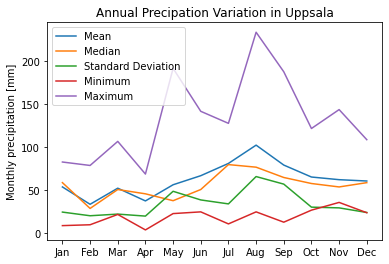

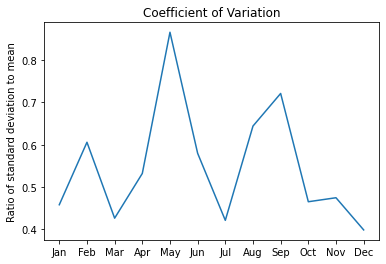

In [5]:
# Making plots to show the annual variation
plt.title('Annual Precipation Variation in Uppsala')
plt.plot(monthly_mean, label='Mean')
plt.plot(monthly_median, label='Median')
plt.plot(monthly_std, label='Standard Deviation')
plt.plot(monthly_min, label='Minimum')
plt.plot(monthly_max, label='Maximum') 
plt.legend(loc='best')
plt.ylabel('Monthly precipitation [mm]')
plt.show()

plt.title('Coefficient of Variation')
plt.plot(monthly_cv)
plt.ylabel('Ratio of standard deviation to mean')
plt.show()

#### Question 2

For daily data (file *P_Uppsala.dat*, values in [mm]): Estimate the probability for daily precipitation that

1. Equal zero
2. more than zero
3. more than 10 mm
4. more than 10 mm for days with precipitation

,3
0_1_2,
1981-01-01,1.5
1981-01-02,0.0
1981-01-03,0.0
1981-01-04,0.4
1981-01-05,0.0


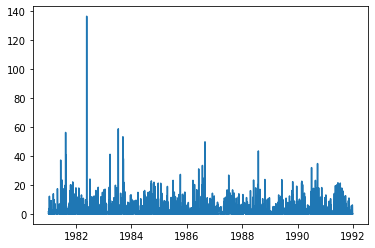

In [6]:
# Reading the daily data file
daily_data = pd.read_csv('P_Uppsala.dat',index_col = 0, parse_dates = [[0, 1, 2]], sep="\t", header=None)
plt.plot(daily_data)
daily_data.head()

In [7]:
# Finding the size of the sample
n = float(np.size(daily_data))
# Finding the number of days with zero rain
nr_of_zeros = daily_data == 0.0 # Boolean array with days with zero rain as 'True'
n_zeros = np.sum(nr_of_zeros).iloc[0]
# Finding the number of days with rain (more than zero)
n_rain = n - n_zeros
# Finding the number of days with more than 10 mm rain
n_10mm = np.sum(daily_data >= 10.0).iloc[0]

In [8]:
# Making probability estimations
p_zero = n_zeros/n # The estimated probability of zero precipitation
p_rain = n_rain/n # The estimated probability of more than zero precipitation
p_10mm = n_10mm/n # The estimated probability of more than 10 mm precipitation
p_10mm_if_rain = n_10mm/n_rain # The estimated probability of more than 10 mm for days with precipitation
print('--- Estimated probabilities: ---')
print('Probability of 0 mm precipitation: %.2f' %(p_zero*100), '%')
print('Probability of more than 0 mm precipitation: %.2f' %(p_rain*100), '%')
print('Probability of more than 10 mm precipitation: %.2f' %(p_10mm*100), '%')
print('Probability of more than 10 mm for days with precipitation: %.2f' %(p_10mm_if_rain*100), '%')

--- Estimated probabilities: ---
Probability of 0 mm precipitation: 52.83 %
Probability of more than 0 mm precipitation: 47.17 %
Probability of more than 10 mm precipitation: 5.95 %
Probability of more than 10 mm for days with precipitation: 12.61 %


#### Question 3

From the daily data, calculate the maximum 1-day, 3-day and 5-day average rainfall amount, and state the date/period.

*Hint: to compute average over x days, you can check out the pandas dataframe method rolling().*

In [9]:
# Calculating the 1-day maximum amount
one_day_max = daily_data.max().iloc[0]
one_day_max_date = daily_data.idxmax().iloc[0] # Returns the date of the maximum 1-day average rainfall amount

# Calculating the 3-day maximum amount
three_day_avg = daily_data.rolling(3).sum()/3. # Array of average rainfall for the last three days each day
three_day_max = three_day_avg.max().iloc[0] 
three_day_max_date = three_day_avg.idxmax().iloc[0] # Returns the date of the maximum 3-day average rainfall amount

# Calculating the 5-day maximum amount
five_day_avg = daily_data.rolling(5).sum()/5. # Array of average rainfall for the last five days each day
five_day_max = five_day_avg.max().iloc[0] 
five_day_max_date = five_day_avg.idxmax().iloc[0] # Returns the date of the maximum 5-day average rainfall amount

print('Maximum daily rainfall amount: %.2f mm.' %one_day_max, ' Date: %s' %one_day_max_date)
print('Maximum 3-day average rainfall amount: %.2f mm.' %three_day_max, ' Following date: %s' %three_day_max_date)
print('Maximum 3-day average rainfall amount: %.2f mm.' %five_day_max, ' Following date: %s' %five_day_max_date)

Maximum daily rainfall amount: 136.60 mm.  Date: 1982-05-21 00:00:00
Maximum 3-day average rainfall amount: 47.40 mm.  Following date: 1982-05-23 00:00:00
Maximum 3-day average rainfall amount: 29.72 mm.  Following date: 1982-05-24 00:00:00


The maximum rainfall amount in the daily data is 136 mm, which occured on May 21 in 1982. 
The maximum 3-day average rainfall amount is 47.40 mm, which occured in the period May 20 to May 22 in 1982.
The maximum 5-day average rainfall amount is 29.72 mm, which occured in the period May 19 to May 23 in 1982.

We can see that these maxima are all from the same time period, and perhaps correspond to the same extreme precipitation event.

#### Question 4

What is the maximum dry-spell days and the maximum wet-spell days of daily rainfall? When do they occur?

In [83]:
# Creating separate dry and wet days arrays
dry_days = daily_data[daily_data == 0].dropna() # Creating array with only days without precipitation 
wet_days = daily_data[daily_data > 0].dropna() # Creating array with only days with precipitation 

# Finding the difference between the dates in the arrays
dry_spell_days = wet_days.index.to_series().diff() # The dry-pell days are the differences between wet days
wet_spell_days = dry_days.index.to_series().diff() # The wet-spell days are the differences between dry days

# Finding the maximum of the dry-spell days and wet-spell days, and corresponding days
max_dry_spell_days = dry_spell_days.max()
max_dry_spell_days_date = dry_spell_days.idxmax()
max_wet_spell_days = wet_spell_days.max()
max_wet_spell_days_date = wet_spell_days.idxmax()

print('The maximum dry-spell days is %s, and occures on %s.' %(max_dry_spell_days, max_dry_spell_days_date))
print('The maximum wet-spell days is %s, and occures on %s.' %(max_wet_spell_days, max_wet_spell_days_date))

The maximum dry-spell days is 23 days 00:00:00, and occures on 1981-05-25 00:00:00.
The maximum wet-spell days is 24 days 00:00:00, and occures on 1988-02-13 00:00:00.


#### Question 5

The depth of clarity of Lake Tahoe was measured at several different places with the results in inches is available in the file *Tahoe.dat*.

1. Plot the histogram (relative frequency) with class intervals of length 5.
2. Plot the cumulative relative frequency and estimate Prob(D≤40)≈? and Prob(15≤D≤30) ≈?

In [17]:
# Reading the Lake Tahoe depth data file
Tahoe_data = pd.read_csv('Tahoe.dat',header=None)
Tahoe_data.head()

,0
0,15.4
1,16.7
2,16.9
3,17.0
4,20.2


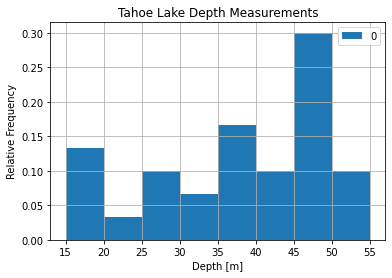

In [91]:
# Plotting the relative frequency as histogram
n = np.size(Tahoe_data) 
bins = np.linspace(15,55,9)
hist = Tahoe_data.plot.hist(bins=bins, weights=np.zeros_like(Tahoe_data) + 1. / n)
hist.set_ylabel('Relative Frequency')
hist.set_xlabel('Depth [m]')
plt.title('Tahoe Lake Depth Measurements')
plt.grid()

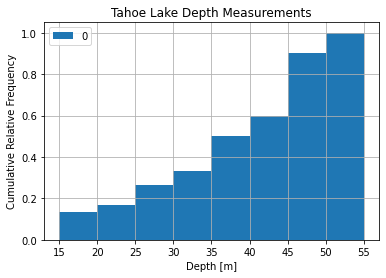

In [92]:
# Plotting the cumulative relative frequency
bins = np.linspace(15,55,9)
cumhist = Tahoe_data.plot.hist(bins=bins,density=True,cumulative=True)
cumhist.set_ylabel('Cumulative Relative Frequency')
cumhist.set_xlabel('Depth [m]')
plt.title('Tahoe Lake Depth Measurements')
plt.grid()

In [ ]:
# Estimating probabilities


####  Question 6

The frequency function for a continuous stochastic variable is shown below. Solve the problems analytically

$$
f(x) = \left\{
        \begin{array}{ll}
            cx^2 & \quad 0 < x < 1 \\
            0 & \quad \text{otherwise}
        \end{array}
    \right.
$$


1. Find the value for c so that f(x) becomes a density function. Use that $\int_{-\infty }^{\infty }f(x)dx$ = 1
$$$$

2. Find the distribution function, F(x)
3. Calculate Prob(x < 0), Prob(x = 0.5), Prob(x > 1), Prob(0<=x<=0.5) and Prob(0<x< 0.5)
4. Find the median
5. Find the mode
6. Calculate the expectation, E(x)
7. Calculate the variance, Var(x)

### Part II: Probability distribution

#### Question 1.
The number of rainy days in July and August at a meteorological station is given in the table below.


Year|1|2|3|4|5|6|7|8|9|10|
-|-|-|-|-|-|-|-|-|-|-|
July|10|15|17|8|9|19|17|14|20|4
August|4|9|8|3|0|10|12|2|8|6

##### a ) Use the Hypergeometric, Binomial and Poisson distributions to calculate 
1) What is the probability of 10 rainy days in each of the months of July and August? 

2) What is the probability of 20 rainy days in the 2 month period? 

*Note: if you wish to use factorial function then you have to import the module 'math' by the command 'import math' then write: math.factorial(x)*


* **Hint: Hypergeometric function:**
    - import scipy.stats
    - from scipy.stats import hypergeom
    - hypergeom.pmf(x, N, n, k)
    - where
        - k is the number of "successes" in the population
        - x is the number of "successes" in the sample
        - N is the size of the population
        - n is the number sampled

* **Hint: Binomial distribution**
    - from scipy.stats import binom
    - binom.pmf(x,n,p)
    - where
        - p is the probability of success, and n and x same as for hypergeometric.

* **Hint: Poisson Distribution**
    - from scipy.stats import poisson
    - poisson.pmf(x, λ)
    - where
        - λ =pn


##### b) Which assumptions in each method are likely violated by this problem?

##### c) What is the probability that the sixth rainy day of August occurs on 30 August?

#### Question 2
Some politician (who obviously did not go a statistic course) tells the public that the town will be
well prepared to tackle the problems associated with a 10-year flood and that there is nothing to
worry about for the next 9 years. In 10th year, when the flood will occur as he says, the local
flood protection authority will have prepared everything. Compute the probability that the
politician actually is right and that the 10-year flood occurs in tenth year for the first time.

#### Question 3
Assume that the annual maxima discharges in a river station are normally distributed with a mean
of 75 m$^3$/s and a standard deviation of 10 m$^3$/s. What is the probability for any given year to have
a maximum flow that is

a) less than 70 m$^3$/s?

b) larger than 95 m$^3$/s?

c) between 60 and 80 m$^3$/s?

d) What is the flow with 90 % chance to not exceed?

e) What is the flow with 80 % chance to exceed?

f) In which interval (centred on the mean) would 50 % of the flows fall?

 * Hint:You may use the following  functions to find the probability/quantile of our distribution:
     * *scipy.stats.norm(mean, sd).cdf(quantile)# where quantile is a discharge*
     * *scipy.stats.norm(mean, sd).ppf(percentile)#where percentile is a proportion*


#### Question 4
Plot the individual terms of the Poisson distribution for λ  = 3. Approximate the Poisson by the normal and plot the normal approximations on the same graph. Optional: Do the same but with λ = 8.